### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [3]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [5]:
# Your code here
dataset = data.drop(columns = ['StudentID'])

### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [6]:
# Your code here
dataset.isna().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.
 
 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [7]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = dataset['GPA'].values
X = dataset.drop(columns=['GPA'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [8]:
# Your code here
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=13))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(1))

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [10]:
# Your code here
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [11]:
# Your code here
history = model1.fit(X_train, y_train, validation_split= 0.2, epochs= 50, batch_size=10)

Epoch 1/50
153/153 [==============================] - 0s 926us/step - loss: 1.0489 - mean_absolute_error: 0.7170 - val_loss: 0.1435 - val_mean_absolute_error: 0.3020
Epoch 2/50
153/153 [==============================] - 0s 553us/step - loss: 0.1004 - mean_absolute_error: 0.2528 - val_loss: 0.0944 - val_mean_absolute_error: 0.2436
Epoch 3/50
153/153 [==============================] - 0s 552us/step - loss: 0.0699 - mean_absolute_error: 0.2107 - val_loss: 0.0737 - val_mean_absolute_error: 0.2186
Epoch 4/50
153/153 [==============================] - 0s 547us/step - loss: 0.0577 - mean_absolute_error: 0.1919 - val_loss: 0.0658 - val_mean_absolute_error: 0.2071
Epoch 5/50
153/153 [==============================] - 0s 545us/step - loss: 0.0510 - mean_absolute_error: 0.1812 - val_loss: 0.0609 - val_mean_absolute_error: 0.1991
Epoch 6/50
153/153 [==============================] - 0s 532us/step - loss: 0.0450 - mean_absolute_error: 0.1712 - val_loss: 0.0576 - val_mean_absolute_error: 0.1944
Epoc

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

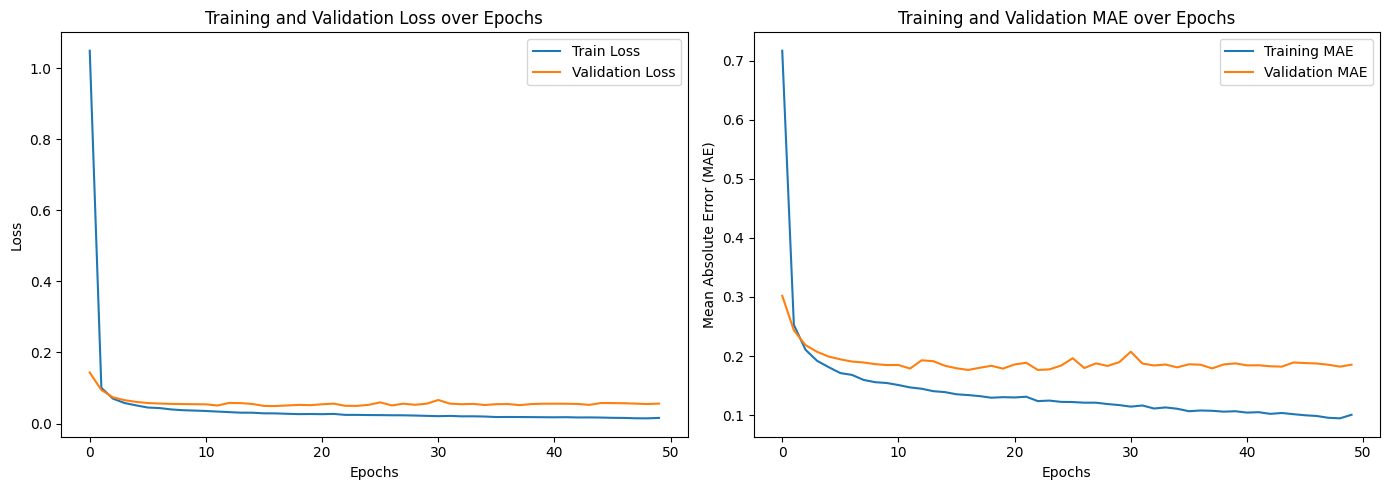

In [12]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot 1: Training and Validation Loss
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot 2: Training and Validation MAE
train_mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

ax2.plot(train_mae, label='Training MAE')
ax2.plot(val_mae, label='Validation MAE')
ax2.set_title('Training and Validation MAE over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.legend()

# Adjust layout and show the plots
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [13]:
# Your code here
test_loss_1 = model1.evaluate(X_test, y_test)

print(f"MSE: {test_loss_1[0]} MAE: {test_loss_1[1]}")


15/15 [==============================] - 0s 420us/step - loss: 0.0544 - mean_absolute_error: 0.1812
MSE: 0.054392457008361816 MAE: 0.1811576634645462


### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [14]:
# Your code here
y_pred = model1.predict(X_test)

for i in range(len(y_test)):
    print(f'Predicted value: {y_pred[i]}   Actual value: {y_test[i]}')

15/15 [==============================] - 0s 379us/step
Predicted value: [1.4969109]   Actual value: 1.4277243762746905
Predicted value: [2.6870415]   Actual value: 3.117354434785501
Predicted value: [2.3455005]   Actual value: 2.037768574636005
Predicted value: [3.8043861]   Actual value: 3.5485205508668662
Predicted value: [0.46183276]   Actual value: 0.2489771312307257
Predicted value: [2.7396777]   Actual value: 2.627693905554347
Predicted value: [1.7736498]   Actual value: 2.057378500596372
Predicted value: [2.3205523]   Actual value: 2.248337588471201
Predicted value: [2.002034]   Actual value: 2.1947065208246226
Predicted value: [0.8433067]   Actual value: 0.7581829737450007
Predicted value: [2.8268683]   Actual value: 2.370893096932428
Predicted value: [0.7487638]   Actual value: 0.7664048694920337
Predicted value: [3.0553393]   Actual value: 2.952721567213245
Predicted value: [2.697296]   Actual value: 2.3433313526833226
Predicted value: [2.8775418]   Actual value: 2.7718106588

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [15]:
X2 = dataset.drop(columns = ['Age', 'Gender', 'Extracurricular', 'Sports', 'Music', 'Volunteering'])
y2 = dataset['GPA'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

print('Shape of X_train',X_train.shape)

Shape of X_train (1913, 13)


I dropped all those columns since I do not think they make a significant impact in the model. 

Now define the second model adding dropout layers to reduce overfitting

In [16]:
model2 = Sequential([
    Dense(64, activation='relu', input_dim=8),

    Dropout(0.2),
    
    Dense(32, activation='relu'),

    Dense(1)  
])

model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [17]:
history2 = model2.fit(X_train2, y_train2, validation_split= 0.2, epochs= 100, batch_size=30)

Epoch 1/100
51/51 [==============================] - 0s 1ms/step - loss: 0.9745 - mean_absolute_error: 0.7237 - val_loss: 0.1610 - val_mean_absolute_error: 0.3276
Epoch 2/100
51/51 [==============================] - 0s 602us/step - loss: 0.1802 - mean_absolute_error: 0.3430 - val_loss: 0.0786 - val_mean_absolute_error: 0.2306
Epoch 3/100
51/51 [==============================] - 0s 540us/step - loss: 0.1293 - mean_absolute_error: 0.2872 - val_loss: 0.0497 - val_mean_absolute_error: 0.1807
Epoch 4/100
51/51 [==============================] - 0s 535us/step - loss: 0.1036 - mean_absolute_error: 0.2567 - val_loss: 0.0371 - val_mean_absolute_error: 0.1539
Epoch 5/100
51/51 [==============================] - 0s 533us/step - loss: 0.0918 - mean_absolute_error: 0.2389 - val_loss: 0.0282 - val_mean_absolute_error: 0.1316
Epoch 6/100
51/51 [==============================] - 0s 558us/step - loss: 0.0761 - mean_absolute_error: 0.2163 - val_loss: 0.0237 - val_mean_absolute_error: 0.1207
Epoch 7/100


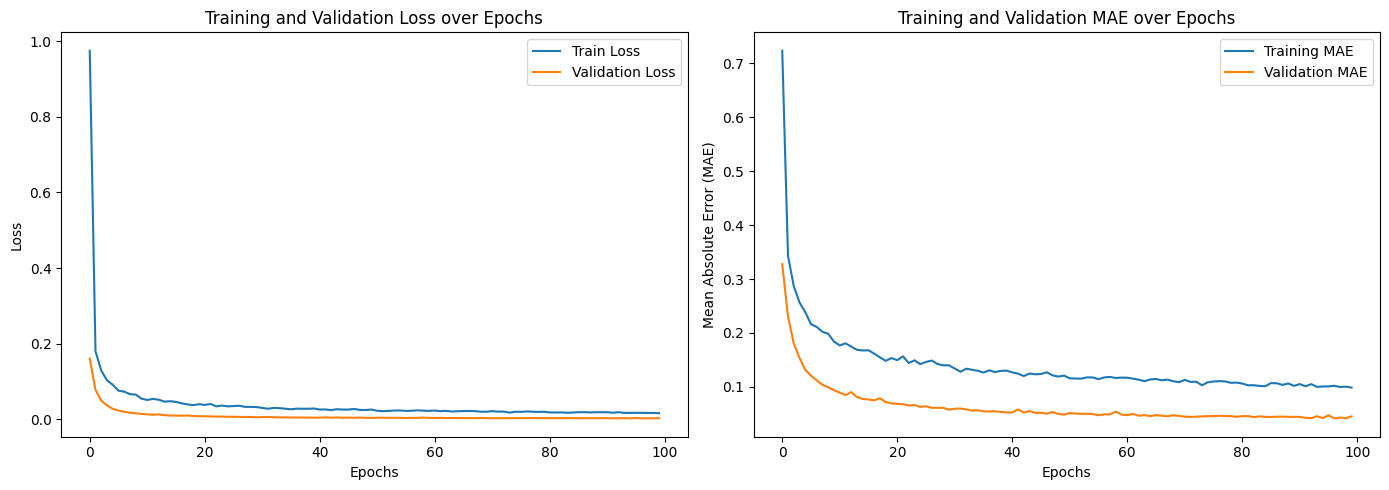

In [18]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot 1: Training and Validation Loss
ax1.plot(history2.history['loss'], label='Train Loss')
ax1.plot(history2.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot 2: Training and Validation MAE
train_mae = history2.history['mean_absolute_error']
val_mae = history2.history['val_mean_absolute_error']

ax2.plot(train_mae, label='Training MAE')
ax2.plot(val_mae, label='Validation MAE')
ax2.set_title('Training and Validation MAE over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.legend()

# Show the plots
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [19]:
test_loss_2 = model2.evaluate(X_test2, y_test2)

print(f"MSE: {test_loss_2[0]} MAE: {test_loss_2[1]}")

15/15 [==============================] - 0s 368us/step - loss: 0.0028 - mean_absolute_error: 0.0416
MSE: 0.00279747461900115 MAE: 0.04155396670103073


#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

There will be no changes to the data engineering in this model. Just changes in the Model Definition, Compile and Training.

I want to test a different architecture adding one more hidden layer and no dropout. Also I reduced the number of epochs since after 50 or 60 the loss function didn't change much.

In [20]:
# Your code here
model3 = Sequential([
    Dense(64, activation='relu', input_dim=8),
    
    Dense(32, activation='relu'),

    Dense(16, activation = 'relu'),

    Dense(1)  
])

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [21]:
history3 = model3.fit(X_train2, y_train2, validation_split= 0.2, epochs= 60, batch_size=30)

Epoch 1/60
51/51 [==============================] - 0s 2ms/step - loss: 1.1847 - mean_absolute_error: 0.8439 - val_loss: 0.2650 - val_mean_absolute_error: 0.4207
Epoch 2/60
51/51 [==============================] - 0s 745us/step - loss: 0.1508 - mean_absolute_error: 0.3097 - val_loss: 0.1121 - val_mean_absolute_error: 0.2732
Epoch 3/60
51/51 [==============================] - 0s 752us/step - loss: 0.0849 - mean_absolute_error: 0.2319 - val_loss: 0.0751 - val_mean_absolute_error: 0.2212
Epoch 4/60
51/51 [==============================] - 0s 764us/step - loss: 0.0619 - mean_absolute_error: 0.1961 - val_loss: 0.0573 - val_mean_absolute_error: 0.1941
Epoch 5/60
51/51 [==============================] - 0s 728us/step - loss: 0.0458 - mean_absolute_error: 0.1678 - val_loss: 0.0427 - val_mean_absolute_error: 0.1657
Epoch 6/60
51/51 [==============================] - 0s 756us/step - loss: 0.0342 - mean_absolute_error: 0.1450 - val_loss: 0.0334 - val_mean_absolute_error: 0.1442
Epoch 7/60
51/51 [

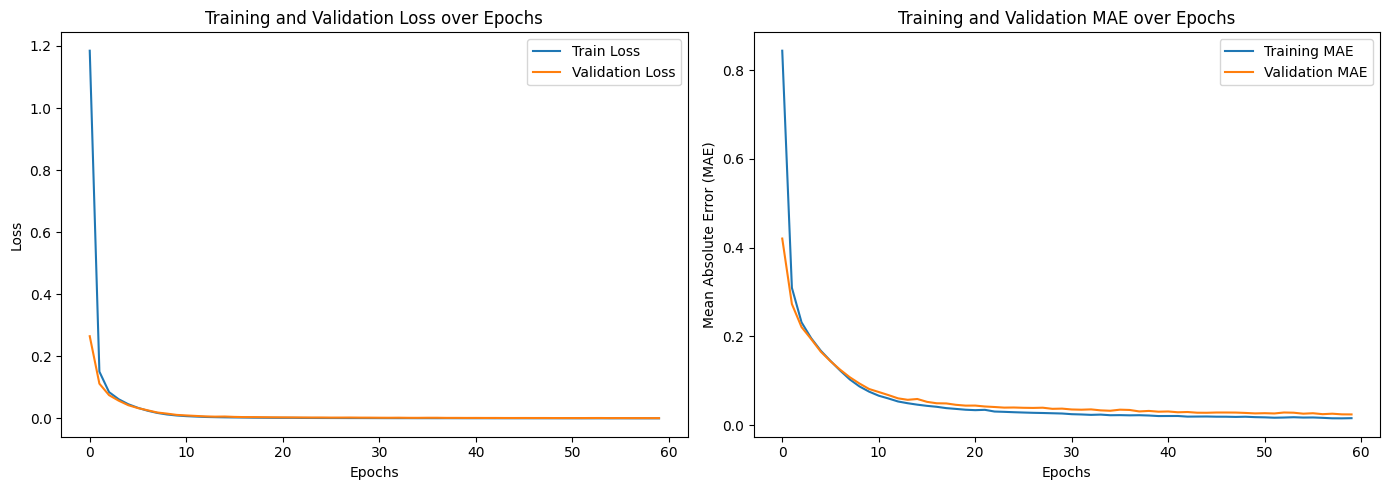

In [22]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot 1: Training and Validation Loss
ax1.plot(history3.history['loss'], label='Train Loss')
ax1.plot(history3.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot 2: Training and Validation MAE
train_mae = history3.history['mean_absolute_error']
val_mae = history3.history['val_mean_absolute_error']

ax2.plot(train_mae, label='Training MAE')
ax2.plot(val_mae, label='Validation MAE')
ax2.set_title('Training and Validation MAE over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.legend()

# Show the plots
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [23]:
test_loss_3 = model3.evaluate(X_test2, y_test2)

print(f"MSE: {test_loss_2[0]} MAE: {test_loss_2[1]}")

15/15 [==============================] - 0s 357us/step - loss: 9.7558e-04 - mean_absolute_error: 0.0229
MSE: 0.00279747461900115 MAE: 0.04155396670103073


## Results


In [24]:
results = pd.DataFrame({
    'Model': [1,2,3],
    'Loss': [test_loss_1[0], test_loss_2[0], test_loss_3[0]],
    'MAE': [test_loss_1[1], test_loss_2[1], test_loss_3[1]]
})

results

,Model,Loss,MAE
0,1,0.054392,0.181158
1,2,0.002797,0.041554
2,3,0.000976,0.022935


In [26]:
sample1 = X_test[:5]
sample2 = X_test2[:5]

pred_1 = model1.predict(sample1)
pred_2 = model2.predict(sample2)
pred_3 = model3.predict(sample2)

sample_results = pd.DataFrame({
    'Student': [1,2,3,4,5],
    'Actual value': y_test2[:5],
    'Model 1 Prediction': pred_1.ravel(),
    'Model 2 Prediction': pred_2.ravel(),
    'Model 3 Prediction': pred_3.ravel(),
})
sample_results

1/1 [==============================] - 0s 8ms/step


,Student,Actual value,Model 1 Prediction,Model 2 Prediction,Model 3 Prediction
0,1,1.427724,1.496911,1.330978,1.470203
1,2,3.117354,2.687042,3.156470,3.129943
2,3,2.037769,2.345500,2.067640,2.066860
3,4,3.548521,3.804386,3.561104,3.496725
4,5,0.248977,0.461833,0.321278,0.260085
